In [1]:
import matplotlib.pyplot as pp
import numpy as np
import PIL
import sklearn.datasets as dts

%matplotlib inline

# Loading an Image

In [2]:
im = PIL.Image.open("trump.jpg")
im = np.array(im.getdata(), np.uint8).reshape(im.size[1], im.size[0], 3)

# Convert to grayscale
im = im.mean(axis=-1)

# Normalize
im = (im - im.mean()) / im.std()

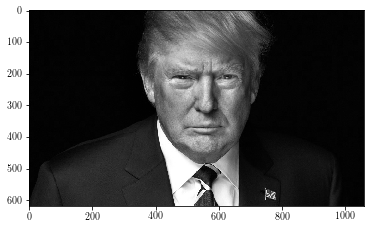

In [3]:
pp.imshow(im, cmap="gray")

In [4]:
# Compute image gradients
dx = im[:, 1:] - im[:, :-1]
dy = im[1:] - im[:-1]

# Reflectance/Shading Split Based on Local Gradient Cutoff

I have read in a "Previous Work" section that the very first methods tried to split the image into its reflectance and shading parts by partitioning the image gradients into two classes and integrating them back up. The idea behind this is that shading is supposed to be smooth while reflectance can change abruptly, e.g. at material boundaries. Therefore large gradients can be attributed to reflectance, while the rest should be shading. The snippet below is the most naive implementation of this idea.

In [5]:
cutoff = 0.1

# Reflectance has large gradients
rdx = np.where(np.abs(dx) > cutoff, dx, 0)
rdy = np.where(np.abs(dy) > cutoff, dy, 0)

# Shading has small gradients
sdx = np.where(np.abs(dx) <= cutoff, dx, 0)
sdy = np.where(np.abs(dy) <= cutoff, dy, 0)

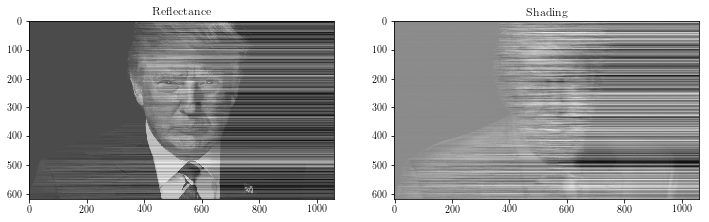

In [6]:
fig, ax = pp.subplots(1, 2, figsize=(12, 4))

ax[0].set_title("Reflectance")
ax[0].imshow(rdx.cumsum(axis=1), cmap="gray")

ax[1].set_title("Shading")
ax[1].imshow(sdx.cumsum(axis=1), cmap="gray")

... erm. The stripes are artifacts because we sum from the left and the image is also illuminated from the left. This makes the gradients on the lefthand side of the picture larger than the corresponding ones on Trump's right half, so that they are misattributed to the wrong part. All in all this seems like a bad idea, because the gradients are hard-assigned.